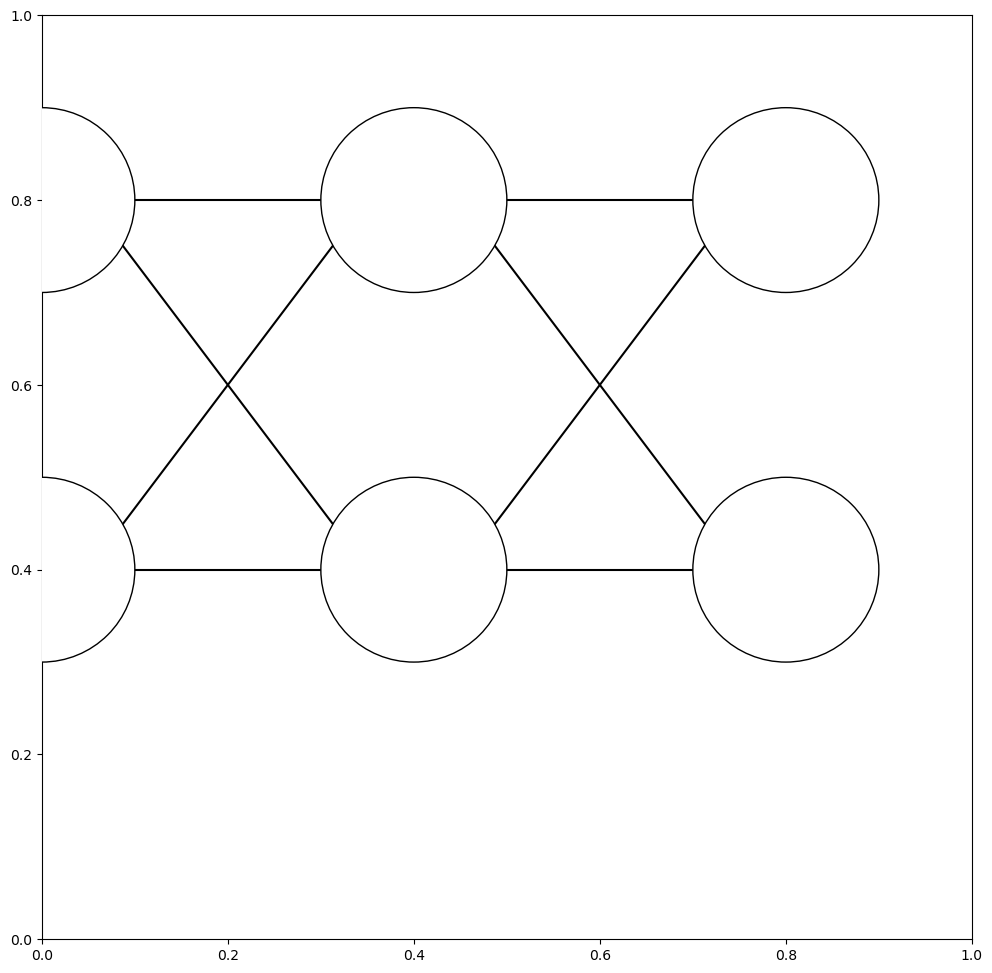

In [1]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, layer_sizes, weights=None, biases=None, activations=None):
    """
    This function draws a representation of a neural network with optional weights, biases, and activations.

    :param ax: Matplotlib Axes object for drawing
    :param layer_sizes: List containing the size of each layer
    :param weights: Nested list containing the weights for each layer (optional)
    :param biases: List containing the biases for each layer (optional)
    :param activations: List containing the activations for each neuron (optional)
    """
    n_layers = len(layer_sizes)
    v_spacing = (1 / float(max(layer_sizes))) * 0.8
    h_spacing = (1 / float(len(layer_sizes) - 1)) * 0.8

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = 1 - v_spacing * (layer_size - 1) / 2
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing, layer_top - m * v_spacing), v_spacing / 4, color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            if biases and n < len(biases):
                plt.text(n * h_spacing, layer_top - m * v_spacing, str(biases[n][m]),
                         horizontalalignment='center', verticalalignment='center')

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = 1 - v_spacing * (layer_size_a - 1) / 2
        layer_top_b = 1 - v_spacing * (layer_size_b - 1) / 2
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + v_spacing / 8, (n + 1) * h_spacing - v_spacing / 8],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='k')
                ax.add_artist(line)
                if weights and n < len(weights):
                    weight_val = weights[n][m][o]
                    plt.text((n + 0.5) * h_spacing, (layer_top_a - m * v_spacing + layer_top_b - o * v_spacing) / 2,
                             str(weight_val), fontsize=8)

# Example usage of the function
fig, ax = plt.subplots(figsize=(12, 12))
draw_neural_net(ax, [2, 2, 2])
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocessing the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Building the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

2023-11-22 02:24:08.481269: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 02:24:08.506596: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 02:24:08.506622: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 02:24:08.506641: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 02:24:08.511323: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 02:24:08.511770: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Epoch 1/5


2023-11-22 02:24:10.111759: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-22 02:24:10.111875: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-22 02:24:10.131608: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

1500/1500 [==============================] - 2s 1ms/step - loss: 0.2869 - accuracy: 0.9181 - val_loss: 0.1568 - val_accuracy: 0.9553
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1280 - accuracy: 0.9620 - val_loss: 0.1262 - val_accuracy: 0.9627
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0872 - accuracy: 0.9745 - val_loss: 0.1007 - val_accuracy: 0.9710
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0881 - val_accuracy: 0.9742
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0492 - accuracy: 0.9856 - val_loss: 0.0908 - val_accuracy: 0.9740


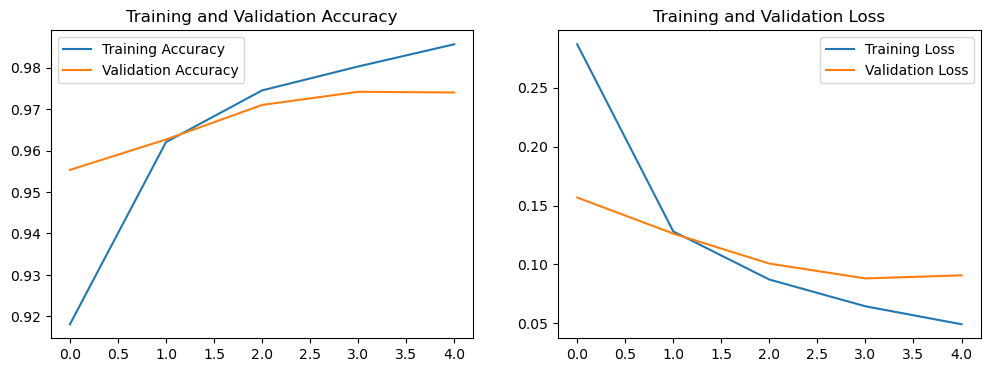

In [2]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

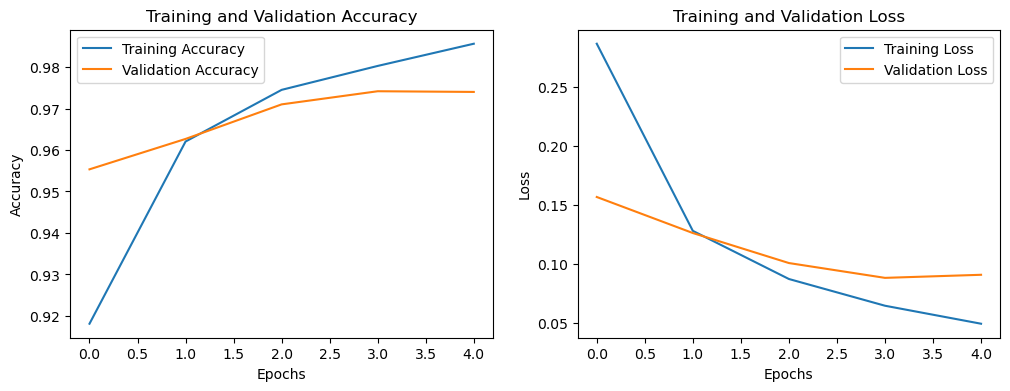

In [3]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()
plt.show()

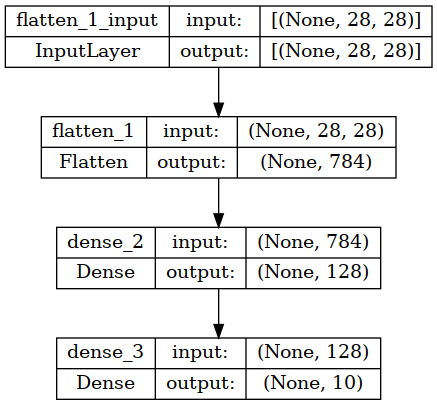

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Building the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Create a plot of the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

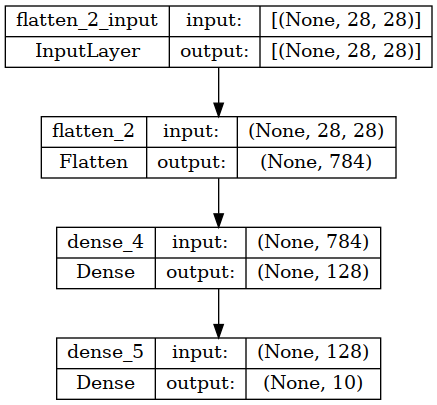

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model

# Building the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Generate a plot of the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

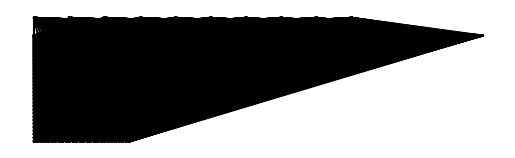

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the structure of the neural network
input_layer = np.full((28, 28), 0.1)
hidden_layer = np.full((128,), 0.3)
output_layer = np.full((10,), 0.5)

# Create a figure
fig, ax = plt.subplots()

# Helper function to draw neurons
def draw_neuron(ax, pos, layer_size, neuron_radius):
    theta = np.linspace(0, 2*np.pi, 100)
    x = neuron_radius * np.cos(theta) + pos[0]
    y = neuron_radius * np.sin(theta) + pos[1]
    ax.fill(x, y, 'b')

# Helper function to draw connections
def draw_connections(ax, layer1, layer2, neuron_radius):
    for i, neuron1 in enumerate(layer1):
        for j, neuron2 in enumerate(layer2):
            ax.plot([neuron1[0], neuron2[0]], [neuron1[1], neuron2[1]], 'k')

# Draw input layer neurons
input_neurons = []
for i, row in enumerate(input_layer):
    for j, neuron in enumerate(row):
        pos = (j, i)
        draw_neuron(ax, pos, len(row), neuron)
        input_neurons.append(pos)

# Draw hidden layer neurons
hidden_neurons = []
for i, neuron in enumerate(hidden_layer):
    pos = (i, 30)
    draw_neuron(ax, pos, len(hidden_layer), neuron)
    hidden_neurons.append(pos)

# Draw output layer neurons
output_neurons = []
for i, neuron in enumerate(output_layer):
    pos = (i*10, 35)
    draw_neuron(ax, pos, len(output_layer), neuron)
    output_neurons.append(pos)

# Draw connections between input and hidden layer
draw_connections(ax, input_neurons, hidden_neurons, 0.1)

# Draw connections between hidden and output layer
draw_connections(ax, hidden_neurons, output_neurons, 0.3)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Remove the axes
ax.axis('off')

# Show the plot
plt.show()

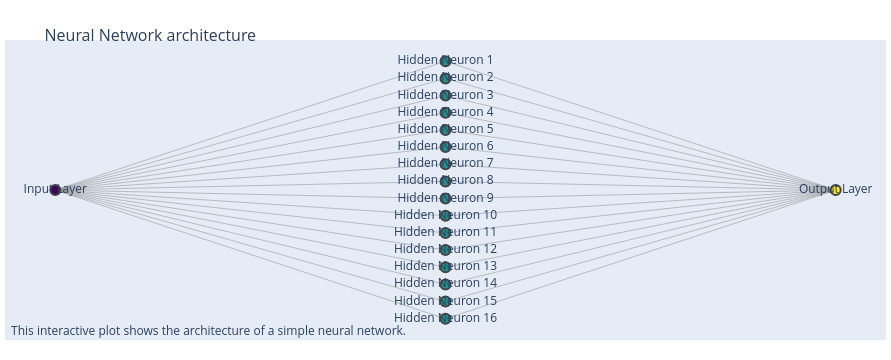

In [8]:
import networkx as nx
import plotly.graph_objects as go

# Create a graph
G = nx.Graph()

# Add nodes with the layer attribute
G.add_node('Input Layer', layer=1)
for i in range(1, 17):  # For the 128 neurons in the hidden layer
    G.add_node(f'Hidden Neuron {i}', layer=2)
G.add_node('Output Layer', layer=3)

# Connect nodes
for i in range(1, 17):
    G.add_edge('Input Layer', f'Hidden Neuron {i}')
for i in range(1, 17):
    G.add_edge(f'Hidden Neuron {i}', 'Output Layer')

# Position the nodes by layer
pos = nx.multipartite_layout(G, subset_key="layer")

# Draw the nodes
node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes],
    y=[pos[node][1] for node in G.nodes],
    text=[node for node in G.nodes],
    mode='markers+text',
    marker=dict(
        size=10,
        color=[G.nodes[node]['layer'] for node in G.nodes], # Color nodes by layer
        colorscale='Viridis', 
        line_width=2
    )
)

# Draw the edges
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Neural Network architecture',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="This interactive plot shows the architecture of a simple neural network.",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Show the figure
fig.show()

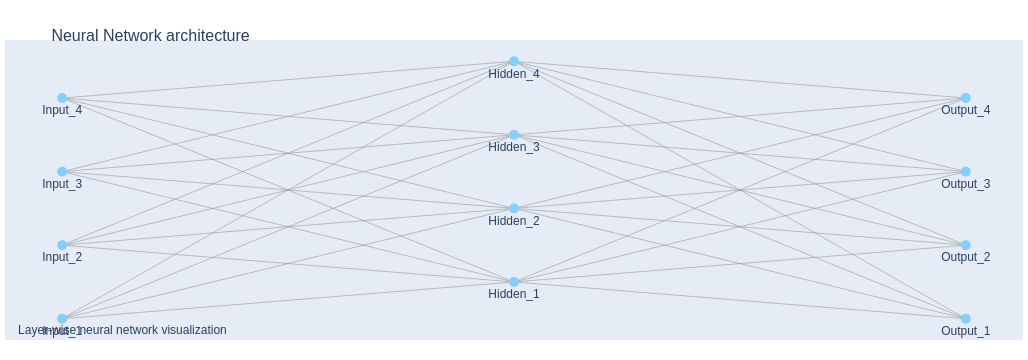

In [12]:
import networkx as nx
import plotly.graph_objects as go

# Create a directed graph
G = nx.DiGraph()

# Add nodes with the layer attribute
input_layer_nodes = [f'Input_{i}' for i in range(1, 5)]
hidden_layer_nodes = [f'Hidden_{i}' for i in range(1, 5)]
output_layer_nodes = [f'Output_{i}' for i in range(1, 5)]

# Add nodes to the graph
for node in input_layer_nodes + hidden_layer_nodes + output_layer_nodes:
    G.add_node(node)

# Connect nodes in the input layer to the hidden layer
for input_node in input_layer_nodes:
    for hidden_node in hidden_layer_nodes:
        G.add_edge(input_node, hidden_node)

# Connect nodes in the hidden layer to the output layer
for hidden_node in hidden_layer_nodes:
    for output_node in output_layer_nodes:
        G.add_edge(hidden_node, output_node)

# Define positions for the three layers
pos = {node: (0, i) for i, node in enumerate(input_layer_nodes)}
pos.update({node: (1, i + 0.5) for i, node in enumerate(hidden_layer_nodes)})
pos.update({node: (2, i) for i, node in enumerate(output_layer_nodes)})

# Draw the nodes
node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    text=[node for node in G.nodes()],
    mode='markers+text',
    marker=dict(
        size=10,
        color='LightSkyBlue'
    ),
    textposition="bottom center"
)

# Draw the edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Neural Network architecture',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="Layer-wise neural network visualization",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Model with Three Hidden Layers
model_three_hidden = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model_three_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_three_hidden.fit(train_images, train_labels, epochs=5, batch_size=128)

# Model with One Hidden Layer
model_one_hidden = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_one_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_one_hidden.fit(train_images, train_labels, epochs=5, batch_size=128)

# Evaluate models
accuracy_three_hidden = model_three_hidden.evaluate(test_images, test_labels)[1]
accuracy_one_hidden = model_one_hidden.evaluate(test_images, test_labels)[1]

print(f"Accuracy of Model with Three Hidden Layers: {accuracy_three_hidden}")
print(f"Accuracy of Model with One Hidden Layer: {accuracy_one_hidden}")

2023-11-22 14:13:18.078569: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 14:13:18.690348: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 14:13:18.690390: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 14:13:18.693618: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 14:13:19.045450: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 14:13:19.048028: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.3655 - accuracy: 0.8907
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1355 - accuracy: 0.9600
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0955 - accuracy: 0.9710
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0716 - accuracy: 0.9783
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0565 - accuracy: 0.9827
Epoch 1/5
469/469 [==============================] - 1s 981us/step - loss: 0.4231 - accuracy: 0.8839
Epoch 2/5
469/469 [==============================] - 0s 968us/step - loss: 0.2078 - accuracy: 0.9412
Epoch 3/5
469/469 [==============================] - 0s 974us/step - loss: 0.1573 - accuracy: 0.9547
Epoch 4/5
469/469 [==============================] - 0s 970us/step - loss: 0.1263 - accuracy: 0.9642
Epoch 5/5
313/313 [==============================] - 0s 651us/step - loss: 0.1146 - accuracy: 0.9655


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import KFold

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define a function to create the model
def create_model(hidden_layer_one=32, hidden_layer_two=32, hidden_layer_three=32, dropout_rate=0.0):
    model = Sequential([
        Flatten(input_shape=(28 * 28,)),
        Dense(hidden_layer_one, activation='relu'),
        Dropout(dropout_rate),
        Dense(hidden_layer_two, activation='relu'),
        Dropout(dropout_rate),
        Dense(hidden_layer_three, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters grid
hidden_layer_one_options = [32, 64, 128]
hidden_layer_two_options = [32, 64, 128]
hidden_layer_three_options = [32, 64, 128]
dropout_rate_options = [0.0, 0.2, 0.5]
batch_size_options = [64, 128, 256]
epoch_options = [5, 10]

# Perform grid search
best_score = 0
best_params = {}

for h1 in hidden_layer_one_options:
    for h2 in hidden_layer_two_options:
        for h3 in hidden_layer_three_options:
            for dropout_rate in dropout_rate_options:
                for batch_size in batch_size_options:
                    for epochs in epoch_options:
                        print(h1,h2,h3,dropout_rate,batch_size,epochs)
                        model = create_model(h1, h2, h3, dropout_rate)
                        model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=0)
                        score = model.evaluate(test_images, test_labels, verbose=0)[1]
                        if score > best_score:
                            best_score = score
                            best_params = {'hidden_layer_one': h1, 'hidden_layer_two': h2, 'hidden_layer_three': h3, 'dropout_rate': dropout_rate, 'batch_size': batch_size, 'epochs': epochs}

print("Best Score: ", best_score)
print("Best Hyperparameters: ", best_params)

32 32 32 0.0 64 5
32 32 32 0.0 64 10
32 32 32 0.0 128 5
32 32 32 0.0 128 10
32 32 32 0.0 256 5
32 32 32 0.0 256 10
32 32 32 0.2 64 5
32 32 32 0.2 64 10
32 32 32 0.2 128 5
32 32 32 0.2 128 10
32 32 32 0.2 256 5
32 32 32 0.2 256 10
32 32 32 0.5 64 5


KeyboardInterrupt: 

In [1]:
import numpy as np
import tensorflow as tf

# Sample data: Fahrenheit temperatures and their Celsius equivalents
fahrenheit = np.array([-40, 14, 32, 68, 212], dtype=float)
celsius = np.array([-40, -10, 0, 20, 100], dtype=float)

# Defining a single-layer, single-neuron model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# Compile the model with mean squared error loss and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(fahrenheit, celsius, epochs=500)

# Predict the Celsius temperature for a new Fahrenheit value
predicted_celsius = model.predict([100.0])
print(predicted_celsius)

2023-11-23 00:16:26.393441: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 00:16:26.393467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 00:16:26.394165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 00:16:26.398928: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500


2023-11-23 00:16:27.633424: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2023-11-23 00:16:27.633444: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: Laxmi
2023-11-23 00:16:27.633447: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: Laxmi
2023-11-23 00:16:27.633483: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 525.147.5
2023-11-23 00:16:27.633496: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 545.23.8
2023-11-23 00:16:27.633500: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 545.23.8 does not match DSO version 525.147.5 -- cannot find working devices in this configuration


1/1 [==============================] - 0s 186ms/step - loss: 34046.5742
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 34008.7461
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 33970.9492
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 33933.1719
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 33895.4141
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 33857.6758
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 33819.9609
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 33782.2734
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 33744.6094
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 33706.9727
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 33669.3516
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 33631.7617
Epoch 13/500
1/1 [=====

In [2]:
predicted_celsius

array([[-86.61824]], dtype=float32)

In [4]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoded format and back to integers for stratified k-fold
train_labels_categorical = to_categorical(train_labels)

# Prepare for K-fold cross-validation
kfold = StratifiedKFold(n_splits=5)
accuracy_three_hidden = []
accuracy_one_hidden = []

# K-fold Cross Validation model evaluation
for train, test in kfold.split(train_images, train_labels):
    # Model with Three Hidden Layers
    model_three_hidden = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model_three_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_three_hidden.fit(train_images[train], train_labels_categorical[train], epochs=5, batch_size=128, verbose=0)
    scores = model_three_hidden.evaluate(train_images[test], train_labels_categorical[test], verbose=0)
    accuracy_three_hidden.append(scores[1])

    # Model with One Hidden Layer
    model_one_hidden = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model_one_hidden.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_one_hidden.fit(train_images[train], train_labels_categorical[train], epochs=5, batch_size=128, verbose=0)
    scores = model_one_hidden.evaluate(train_images[test], train_labels_categorical[test], verbose=0)
    accuracy_one_hidden.append(scores[1])

# Calculate and print standard deviations
std_dev_three_hidden = np.std(accuracy_three_hidden)
std_dev_one_hidden = np.std(accuracy_one_hidden)

print(f"Standard Deviation of Model with Three Hidden Layers: {std_dev_three_hidden}")
print(f"Standard Deviation of Model with One Hidden Layer: {std_dev_one_hidden}")

Standard Deviation of Model with Three Hidden Layers: 0.0024452812143972314
Standard Deviation of Model with One Hidden Layer: 0.0021721677127127447


In [2]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Set up XGBoost classifier with GPU
params = {
    'objective': 'multi:softprob',
    'num_class': 10,
    'tree_method': 'hist',
    'device' : 'cuda'
}

# Define grid search parameters
param_grid = {
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.5, 1],
    'lambda': [1, 2, 3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize XGBoost with GPU
model = xgb.XGBClassifier(**params)

# Grid search with KFold cross-validation
kfold = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_search.fit(train_images, train_labels)

# Best parameters and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate on test data
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_images)
mse = mean_squared_error(test_labels, predictions)

print(f"Best Hyperparameters: {best_params}")
print(f"Best MSE on Training: {-best_score}")
print(f"MSE on Test Data: {mse}")

/home/a/Anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:41:18] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/home/a/Anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:41:55] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/home/a/Anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:42:34] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/home/a/Anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:43:12] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/home/a/Anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:43:49] WARNING: /workspace/src/context.cc:44: No visible GP

KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from PIL import Image
from scipy.ndimage import uniform_filter

# Load the image from the file system
image_path = 'pexels-balamurugan-anbazhagan-763097.jpg'
original_image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(original_image)

# Define the kernel size for the blurring filter
kernel_size = (15, 15)

# Initialize variables for animation
frame_count = image_array.shape[1] // kernel_size[1] + 1  # Number of frames to cover the whole image
blurred_image = np.copy(image_array)

# Set up the figure for animation
fig, ax = plt.subplots()
img_display = ax.imshow(image_array, cmap='gray')
ax.axis('off')  # Turn off axis

def animate(i):
    global blurred_image
    # Apply the blurring filter to the next column
    start_col = i * kernel_size[1]
    end_col = start_col + kernel_size[1]
    blurred_image[:, start_col:end_col] = uniform_filter(image_array[:, start_col:end_col], size=kernel_size[1])
    
    # Update the image display with the partially blurred image
    img_display.set_array(blurred_image)
    return (img_display,)

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=frame_count, interval=200, blit=True)

# Save the animation as a GIF file
ani.save('blurring_animation.gif', writer='imagemagick', fps=2)
plt.close()

# Return the path to the saved GIF
#'/mnt/data/blurring_animation.gif'
